# 基函数例子

run boxmesh2d with time: 0.000443124000000239
cell:

0 :  [2 3 0]
1 :  [1 0 3]


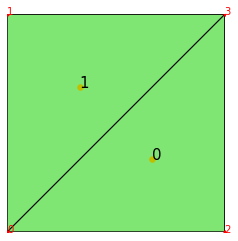

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh import MeshFactory

mf = MeshFactory()
box = [0, 1, 0, 1]
mesh=mf.boxmesh2d(box, nx=1, ny=1, meshtype='tri')
NC = mesh.number_of_cells()

node = mesh.entity('node')
edge = mesh.entity('edge')
cell = mesh.entity('cell')

print('cell:\n')
for i, val in enumerate(cell):
    print(i,": ", val)
    
v0 = node[cell[:,2],:] - node[cell[:,1],:] # x2-x1
v1 = node[cell[:,0],:] - node[cell[:,2],:] # x0-x2
v2 = node[cell[:,1],:] - node[cell[:,0],:] # x1-x0
nv = np.cross(v2,-v1) # 三角形对应平行四边形的面积

Dlambda = np.zeros((NC,3,2), dtype=np.float64)
length = nv 
W = np.array([[0, 1], [-1 ,0]], dtype=np.int_)
Dlambda[:,0,:] = v0@W/length.reshape(-1, 1)
Dlambda[:,1,:] = v1@W/length.reshape(-1, 1)
Dlambda[:,2,:] = v2@W/length.reshape(-1, 1)

fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex = True)
mesh.find_cell(axes, showindex = True)